# NLP Text Analysis - Robert Frost Poems
# Subhashini Natarajan

In [1]:
# Install PyPDF2

!pip install PyPDF2

     |████████████████████████████████| 225kB 934kB/s eta 0:00:01


In [6]:
# Import required libraries

import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# Read the pdf file

filename = '/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 680/Project 3/Robert Frost.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [4]:
# Print document information

ind_manifesto.getDocumentInfo()

{'/Producer': 'iTextSharp 5.0.5 (c) 1T3XT BVBA',
 '/CreationDate': "D:20171118154046+03'00'",
 '/ModDate': "D:20171118154046+03'00'"}

In [5]:
# Number of pages in the pdf

total_pages = ind_manifesto.numPages
total_pages

308

In [6]:
# Install textextract

!pip install textract

In [7]:
# Import text extract library

import textract   

In [8]:
# Read the contents of the pdf into a string 

count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()

In [9]:
# Exclude blank spaces

if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

In [10]:
# Install auto correct package

!pip install autocorrect

In [11]:
# Install nltk

!pip install nltk

In [7]:
# Import required libraries

from autocorrect import Speller
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manikantanvenkataraman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Define a function to convert the text to lower case 

def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Spell check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)


In [15]:
# Define a function to remove the special characters

def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [16]:
# Lemmatize the words

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manikantanvenkataraman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Store the lemmatized words in a string

clean_data = ' '.join(lemmatized_word)


In [29]:
# Store the processed data in a dataframe

import numpy as np
import pandas as pd

df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Frost']
df

,script
Frost,classic poetry series robert frost poem public...


In [30]:
#  Count the occurrences of tokens and build a sparse matrix of documents x tokens

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
np.zeros(5)
vars(np).keys()

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transform the data into a bag of words

data_vect = vect.fit_transform(corpus)

In [31]:
# Build a matrix with the count of tokens and token names

feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_can_,abandon,abide,abishag,abode,abreast,abroad,absence,absent,absurdly,...,york,young,younger,youngster,youth,youthful,zealot,zealous,zephyr,zigzag
Frost,1,2,2,1,2,1,2,1,1,1,...,5,28,3,1,3,2,1,1,2,1


In [32]:
# Transpose the matrix

data = data_vect_feat.transpose()
data

,Frost
_can_,1
abandon,2
abide,2
abishag,1
abode,2
...,...
youthful,2
zealot,1
zealous,1
zephyr,2


In [33]:
# Build a dictionary to store the top 100 words in the book

import matplotlib.pyplot as plt
import seaborn as sn


top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))
    

key Frost, value [('world', 344), ('poetry', 315), ('frost', 230), ('like', 218), ('robert', 195), ('know', 188), ('say', 173), ('come', 149), ('said', 136), ('make', 130), ('quot', 129), ('tree', 123), ('way', 115), ('thing', 113), ('think', 111), ('let', 110), ('time', 102), ('thought', 95), ('night', 86), ('flower', 83), ('came', 82), ('man', 82), ('hand', 82), ('tell', 81), ('day', 81), ('look', 81), ('house', 81), ('good', 78), ('little', 77), ('long', 72), ('life', 69), ('place', 69), ('old', 68), ('year', 65), ('new', 65), ('saw', 65), ('right', 65), ('snow', 64), ('left', 64), ('away', 63), ('far', 62), ('archivethe', 62), ('want', 62), ('ca', 61), ('door', 60), ('leaf', 59), ('wood', 58), ('went', 57), ('love', 56), ('light', 56), ('eye', 56), ('bird', 55), ('wind', 52), ('wall', 52), ('looked', 51), ('word', 51), ('knew', 50), ('heard', 50), ('end', 50), ('gone', 49), ('going', 48), ('mountain', 47), ('round', 46), ('child', 46), ('window', 45), ('stood', 45), ('home', 45), (

In [34]:
# Pull top 100 words and print the first 10

from collections import Counter


words = []
for poet in data:
    top = [word for (word, count) in top_dict[poet]]
    for t in top:
        words.append(t)
        
print(words[:10])

['world', 'poetry', 'frost', 'like', 'robert', 'know', 'say', 'come', 'said', 'make']


In [35]:
# Remove the words Robert, Frost and poetry from the list

filt = ['robert', 'frost', 'poetry']  

words = [word for word in words if word not in filt]

print(words[:10])

['world', 'like', 'know', 'say', 'come', 'said', 'make', 'quot', 'tree', 'way']


In [ ]:
# Install and import wordcloud

!pip install wordcloud
import wordcloud

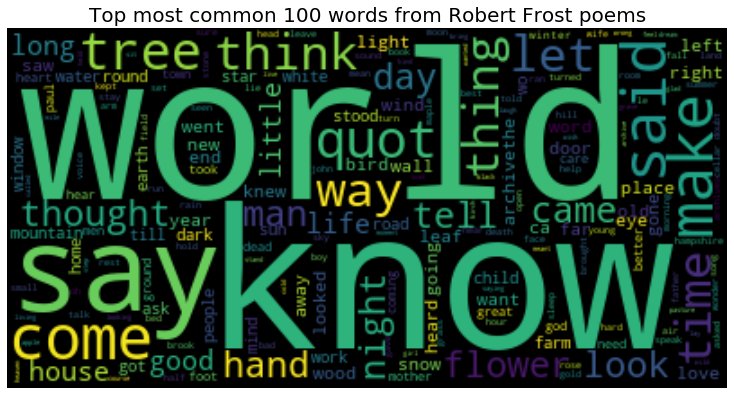

In [36]:
# Import other required libraries

from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the frequency of usage and display as wordcloud

words_except_stop_dist = nltk.FreqDist(w for w in words[:200]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Robert Frost poems",fontsize=20)
plt.tight_layout(pad=0)
#plt.savefig('Manifesto_top_100.jpeg')
plt.show()

# Sentiment Analysis

In [ ]:
# Install vandersentiment package

!pip install vaderSentiment

In [37]:
# Import required libraries

from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [38]:
# Textblob to obtain Polarity and Subjectivity 

blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.06836453311688115, subjectivity=0.45382644761381175)

# Text Summarization 

In [3]:
# Importing all the necessary libraries

from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [4]:
# Define a function to perform text summarization

from string import punctuation
from heapq import nlargest

def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    STOP_WORDS = stopwords.words('english')
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [9]:
# Summarize the clean data

import spacy

text = '''Robert Lee Frost was an American poet. He is highly regarded for his realistic depictions of rural life and his command of American colloquial speech. His work frequently employed settings from rural life in New England in the early twentieth century, using them to examine complex social and philosophical themes. A popular and often-quoted poet, Frost was honored frequently during his lifetime, receiving four Pulitzer Prizes for Poetry.
Robert Frost was born in San Francisco, California, to journalist William Prescott Frost, Jr., and Isabelle Moodie. His mother was of Scottish descent, and his father descended from Nicholas Frost of Tiverton, Devon, England, who had sailed to New Hampshire in 1634 on the Wolfrana. 
Frosts father was a teacher and later an editor of the San Francisco Evening Bulletin (which afterwards merged into the San Francisco Examiner), and an unsuccessful candidate for city tax collector. After his fathers death in May 5, 1885, in due time the family moved across the country to Lawrence, Massachusetts under the patronage of (Roberts grandfather) William Frost, Sr., who was an overseer at a New England mill. Frost graduated from Lawrence High School in 1892. Frosts mother joined the Swedenborgian church and had him baptized in it, but he left it as an adult. 
Despite his later association with rural life, Frost grew up in the city, and published his first poem in his high schools magazine. He attended Dartmouth College long enough to be accepted into the Theta Delta Chi fraternity. Frost returned home to teach and to work at various jobs including delivering newspapers and factory labor. He did not enjoy these jobs at all, feeling his true calling as a poet.
In 1894 he sold his first poem, My Butterfly: An Elegy for fifteen dollars. Proud of this accomplishment he proposed marriage to Elinor Miriam White, but she demurred, wanting to finish college (at St. Lawrence University) before they married. Frost then went on an excursion to the Great Dismal Swamp in Virginia, and asked Elinor again upon his return. Having graduated she agreed, and they were married at Harvard University[citation needed], where he attended liberal
arts studies for two years. He did well at Harvard, but left to support his growing family. Grandfather Frost had, shortly before his death, purchased a farm for the young couple in Derry, New Hampshire; and Robert worked the farm for nine years, while writing early in the mornings and producing many of the poems that would later become famous. Ultimately his farming proved unsuccessful and he returned to education as an English teacher, at Pinkerton Academy from 1906 to 1911, then at the New Hampshire Normal School (now Plymouth State University) in Plymouth, New Hampshire. 
In 1912 Frost sailed with his family to Great Britain, living first in Glasgow before settling in Beaconsfield outside London. His first book of poetry, A Boys Will, was published the next year. In England he made some important acquaintances, including Edward Thomas (a member of the group known as the Dymock Poets), T.E. Hulme, and Ezra Pound. Pound would become the first American to write a (favorable) review of Frosts work. Surrounded by his peers, Frost wrote some of his best work while in England. 
As World War I began, Frost returned to America in 1915. He bought a farm in Franconia, New Hampshire, where he launched a career of writing, teaching, and lecturing. This family homestead served as the Frosts summer home until 1938, and is maintained today as The Frost Place, a museum and poetry conference site at Franconia. During the years 1916–20, 1923–24, and 1927–1938, Frost taught English at Amherst College, Massachusetts, notably encouraging his students to account for the sounds of the human voice in their writing. 
For forty-two years, from 1921 to 1963, Frost spent almost every summer and fall teaching at the Bread Loaf School of English of Middlebury College, at the mountain campus at Ripton, Vermont. He is credited as a major influence upon the development of the school and its writing programs; the Bread Loaf Writers Conference gained renown during Frosts tenure there.[citation needed] The college now owns and maintains his former Ripton farmstead as a national historic site near the Bread Loaf campus. In 1921 Frost accepted a fellowship teaching post at the University of Michigan, Ann Arbor, where he resided until 1927; while there he was awarded a lifetime appointment at the University as a Fellow in Letters. The Robert Frost Ann Arbor home is now situated at The Henry Ford Museum in Dearborn, Michigan. Frost returned to Amherst in 1927. In 1940 he bought a 5-acre (2.0 ha) plot in South Miami, Florida, naming it Pencil Pines; he spent his winters there for the rest of his life. 
Harvards 1965 alumni directory indicates Frost received an honorary degree there. He also received honorary degrees from Bates College and from Oxford and Cambridge universities; and he was the first person to receive two honorary degrees from Dartmouth College. During his lifetime the Robert Frost Middle School in Fairfax, Virginia, and the main library of Amherst College were named after him. 
Frost was 86 when he spoke and performed a reading of his poetry at the inauguration of President John F. Kennedy on January 20, 1961. Some two years later, on January 29, 1963, he died, in Boston, of complications from prostate surgery. He was buried at the Old Bennington Cemetery in Bennington, Vermont. His epitaph reads, I had a lovers quarrel with the world. 
Frosts poems are critiqued in the Anthology of Modern American Poetry, Oxford University Press, where it is mentioned that behind a sometimes charmingly familiar and rural façade, Frosts poetry frequently presents pessimistic and menacing undertones which often are not recognized nor analyzed. 
One of the original collections of Frost materials, to which he himself contributed, is found in the Special Collections department of the Jones Library in Amherst, Massachusetts. The collection consists of approximately twelve thousand items, including original manuscript poems and letters, correspondence, and photographs, as well as audio and visual recordings.
'''

summarize(text, 0.05)

'Frosts poems are critiqued in the Anthology of Modern American Poetry, Oxford University Press, where it is mentioned that behind a sometimes charmingly familiar and rural façade, Frosts poetry frequently presents pessimistic and menacing undertones which often are not recognized nor analyzed. \nGrandfather Frost had, shortly before his death, purchased a farm for the young couple in Derry, New Hampshire; and Robert worked the farm for nine years, while writing early in the mornings and producing many of the poems that would later become famous.'

# Topic Modeling using LDA

In [61]:
# Import gensim and plotting tools

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
import pyLDAvis.gensim_models  # don't skip this

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [20]:
# Build the dictionary with clean text data

data  = []
data.append(clean_text(lower_case))

In [ ]:
# Install spacy

!pip install spacy

In [62]:
import spacy

# Define function to perform Second lemmatization of  data
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatize keeping only noun, adj, vb, adv

data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

/opt/anaconda3/lib/python3.7/site-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [64]:
# Create a tuple with word and its frequency using  corpora.Dictionary

id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [65]:
# Build the LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto', num_topics=20, random_state=100,
                                           update_every=1, passes=20, per_word_topics=True)

In [25]:
#  Topics in the model

from pprint import pprint

pprint(lda_model.print_topics())
doc_lda  = lda_model[corpus]

[(0,
  '0.000*"know" + 0.000*"go" + 0.000*"see" + 0.000*"come" + 0.000*"say" + '
  '0.000*"make" + 0.000*"world" + 0.000*"thing" + 0.000*"look" + '
  '0.000*"leave"'),
 (1,
  '0.000*"say" + 0.000*"know" + 0.000*"go" + 0.000*"come" + 0.000*"see" + '
  '0.000*"look" + 0.000*"think" + 0.000*"make" + 0.000*"tree" + 0.000*"give"'),
 (2,
  '0.000*"go" + 0.000*"come" + 0.000*"say" + 0.000*"know" + 0.000*"think" + '
  '0.000*"make" + 0.000*"see" + 0.000*"take" + 0.000*"look" + 0.000*"let"'),
 (3,
  '0.000*"go" + 0.000*"come" + 0.000*"see" + 0.000*"say" + 0.000*"make" + '
  '0.000*"know" + 0.000*"think" + 0.000*"take" + 0.000*"let" + 0.000*"leave"'),
 (4,
  '0.000*"go" + 0.000*"come" + 0.000*"know" + 0.000*"say" + 0.000*"make" + '
  '0.000*"see" + 0.000*"look" + 0.000*"tree" + 0.000*"tell" + 0.000*"way"'),
 (5,
  '0.000*"say" + 0.000*"see" + 0.000*"know" + 0.000*"come" + 0.000*"go" + '
  '0.000*"make" + 0.000*"think" + 0.000*"look" + 0.000*"take" + 0.000*"world"'),
 (6,
  '0.000*"say" + 0.000*"

In [26]:
# Print model perplexity and coherence score

print('\nPerplexity:', lda_model.log_perplexity(corpus))


# Coherence Score

coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Perplexity: -7.634752531627714
Coherence Score: 0.27143758139698637


In [27]:
# Build the visualization of topics

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis_topics = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [28]:
vis_topics

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
17    -0.200494  0.0       1        1  99.998939
14     0.011473  0.0       2        1   0.000056
0      0.011172 -0.0       3        1   0.000056
13     0.011085  0.0       4        1   0.000056
1      0.011041 -0.0       5        1   0.000056
8      0.010916 -0.0       6        1   0.000056
7      0.010935 -0.0       7        1   0.000056
19     0.010784  0.0       8        1   0.000056
15     0.010685  0.0       9        1   0.000056
9      0.010636  0.0      10        1   0.000056
11     0.010536 -0.0      11        1   0.000056
3      0.010524 -0.0      12        1   0.000056
4      0.010352  0.0      13        1   0.000056
6      0.010382 -0.0      14        1   0.000056
18     0.010216 -0.0      15        1   0.000056
16     0.010195 -0.0      16        1   0.000056
2      0.010197  0.0      17        1   0.000056
12     0.009952  0.0      18        1   0.000056
10     0.009803  0.0      19        1   0.000056
5      0.009611 -0.0      20        1   0.000056, topic_info=      Term        Freq       Total Category  logprob  loglift
3074   say  321.000000  321.000000  Default  30.0000  30.0000
1584    go  294.000000  294.000000  Default  29.0000  29.0000
751   come  265.000000  265.000000  Default  28.0000  28.0000
3117   see  254.000000  254.000000  Default  27.0000  27.0000
1961  know  233.000000  233.000000  Default  26.0000  26.0000
...    ...         ...         ...      ...      ...      ...
936    day    0.000003   79.337087  Topic20  -8.2726  -2.6668
4016   way    0.000003  114.026676  Topic20  -8.2691  -3.0259
3994  want    0.000003   83.300312  Topic20  -8.2736  -2.7165
304   back    0.000003   89.249952  Topic20  -8.2735  -2.7854
3642  tell    0.000003  108.079593  Topic20  -8.2736  -2.9769

[1786 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3         1  0.965085   abreast
6         1  0.964894    absent
9         1  0.964884  accepted
10        1  0.964883    access
25        1  0.964912   actress
...     ...       ...       ...
4138      1  0.964903     wreck
4140      1  0.964828  wretched
4155      1  0.992690      year
4167      1  0.965093    zealot
4168      1  0.964886   zealous

[667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 15, 1, 14, 2, 9, 8, 20, 16, 10, 12, 4, 5, 7, 19, 17, 3, 13, 11, 6])